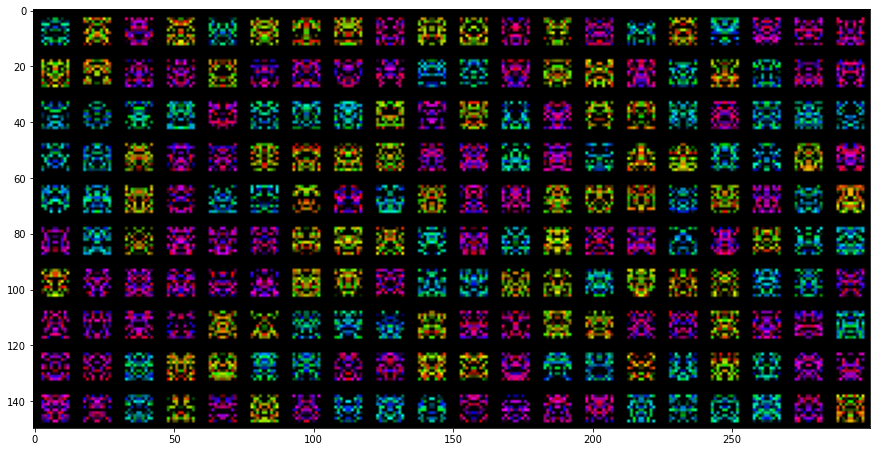

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import random


def get_palete(colors_num):
  return ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(colors_num)]


def get_random_color(excluded_color):
  palete = get_palete(5) + ['#000000'] * 3
  hex_color = palete[random.randint(0, len(palete) - 1)].lstrip('#')
  return tuple(int(hex_color[i: i + 2], 16) if i != excluded_color else 0 for i in (0, 2, 4))


def generate_sprite(n=10, m=10):
  sprite = np.zeros((n, m, 3), dtype=('uint8'))
  excluded_color = random.randint(0, 2) * 2
  for i, row in enumerate(sprite):
    for j, pixel in enumerate(row):
      sprite[i][j] = get_random_color(excluded_color)
      sprite[i][n - j - 1] = sprite[i][j]
  return sprite

n, m = 10, 10

image = np.full((150, 300, 3), [0, 0, 0], dtype=('uint8'))

for x in range(3, 150, n + 5):
  for y in range(3, 300, m + 5):
    image[x: x + n, y: y + m] = generate_sprite(n, m)

plt.figure(figsize=(15, 8))
plt.imshow(image)